# Class 03: Array Computations - Parts I and II 

In this notebook we explore computations on arrays of data. 

## 0. In-Class Drills - NBA salaries

Let's do some in-class drills by looking at statistics of basketball players in the NBA! The data we will analyze contains infomration about each player including their salary from the 2022-2023 season listed in millions of dollars. This table can be found online: https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season

We will load the data as a "pandas DataFrame" which is a data structure we will discuss more the next week. We will then convert the data to lists to explore it further. The lists we are creating are:

- `name_list`: A list of the basketball players' names
- `salary_list`: A list of salaries
- `position_list`: A list of the positions each player plays
- `team_list`: A list of which team each player is on
- `points_per_game_list`: A list showing the average number of points each player scored per game


In [2]:
# load the data and display the first 6 rows

import YData
import pandas as pd

YData.download_data("nba_salaries_2022_23_all.csv")
nba = pd.read_csv("nba_salaries_2022_23_all.csv")  # load in the data

nba[["Player Name", "Salary", "Position", "Team", "PTS"]].head()  # show the first 6 rows


Player Name    Salary Position     Team   PTS
0      Stephen Curry  48070014       PG      GSW  29.4
1          John Wall  47345760       PG      LAC  11.4
2  Russell Westbrook  47080179       PG  LAL/LAC  15.9
3       LeBron James  44474988       PF      LAL  28.9
4       Kevin Durant  44119845       PF  BRK/PHO  29.1

In [3]:
# extract the salaries and the player positions as lists

name_list = nba["Player Name"].to_list()
salary_list = nba["Salary"].to_list()
position_list = nba["Position"].to_list()
team_list = nba["Team"].to_list()
points_per_game_list = nba["PTS"].to_list()


### Drill 1 - Categorical analyses

Can you do the following:
- Calculate the proportion of players who play on the Boston Celtics ("BOS")?

You can also try creating a bar plot showing the number of players on the Boston Celtics ("BOS"), New York Knicks ("NYK") and Golden State Warriors ("GSW").

In [4]:
# Proportion of players on the Celtics ("BOS")

team_list.count("BOS")/len(team_list)


0.034261241970021415

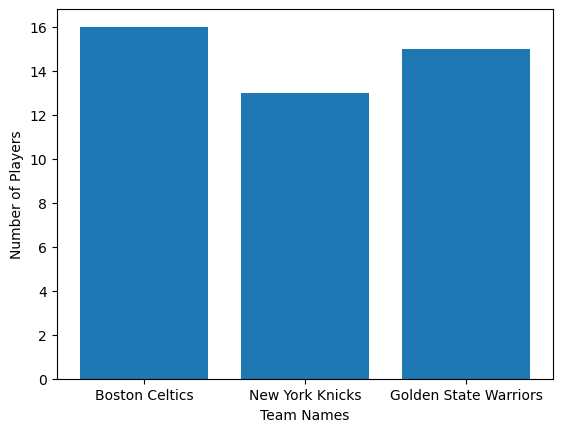

In [5]:
# You can create a bar plot showing the number of players on "BOS", "NYK", and "GSW"

import matplotlib.pyplot as plt
%matplotlib inline

# Create a list of counts of players on the three teams

team_counts = [team_list.count("BOS"),
               team_list.count("NYK"),
               team_list.count("GSW")
              ]


# Create the team names

team_labels = ["Boston Celtics", "New York Knicks", "Golden State Warriors"]


# Create a bar chart of how many players are on each team. Be sure to label your axes!
plt.bar(team_labels, team_counts);
plt.xlabel("Team Names");
plt.ylabel("Number of Players");



### Drill 2 - One quantitative variable analyses

Can you do the following:

1. Create a histogram of the player salaries
2. Calculate the mean salary, the median salary, and the standard deviation of salaries
3. Calcualte the z-score for the first player's salary (i.e., Stephen Curry's salary)


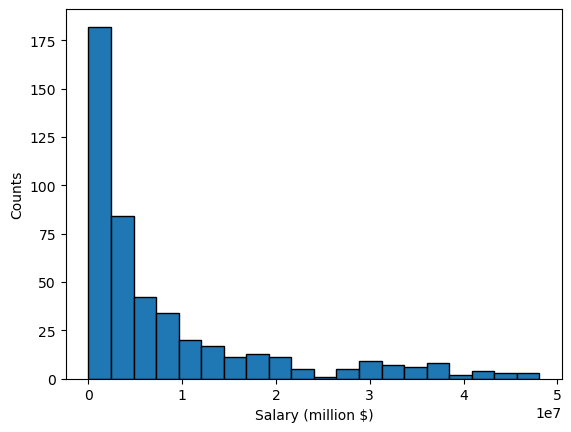

In [6]:
# Plot a histogram of NBA salaries

plt.hist(salary_list, bins = 20, edgecolor = "black");
plt.ylabel("Counts");
plt.xlabel("Salary (million $)");


In [7]:
import statistics

# mean salary

print(statistics.mean(salary_list))


# median salary

print(statistics.median(salary_list))


# standard deviation of salaries

print(statistics.stdev(salary_list))



8416598.74732334
3722040
10708118.046519598


In [8]:
# z-score for the first player's salary (i.e., z-score for Stephen Curry's salary)

z_score = (salary_list[0] - statistics.mean(salary_list))/statistics.stdev(salary_list)
z_score


3.7031171192182546

### Drill 3 - Two Quantitative variables

Can you do the following:

1. Create a scatter plot of salary as a function of the points scored per game
2. Guess what you believe correlation is between salary and points per game, and then calculate the correlation to see if your guess was close.


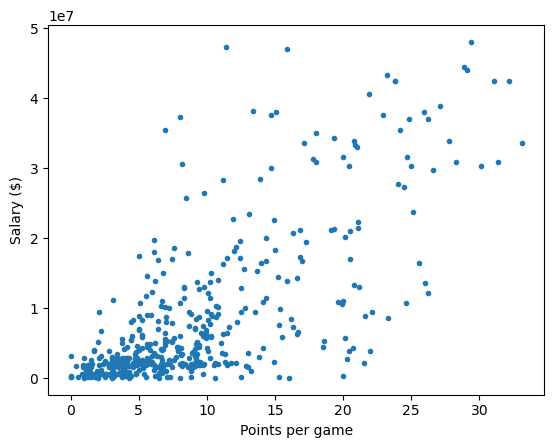

In [9]:

plt.plot(points_per_game_list, salary_list, '.');
plt.xlabel("Points per game");
plt.ylabel("Salary ($)");



In [10]:
# guess the correlation and then calculate it

statistics.correlation(points_per_game_list, salary_list)



0.7275966928493115

## 1. Creating Arrays

Often we want to process data that is all of the same type. For example, we might want to do processing on a data set of numbers (e.g., if we were just analyzing salary data). 

When we have data that is all of the same type, there are faster ways to process data than using a list. In Python, the `numpy` package offers ways to store and process data that is all of the same type using a data structure called a `ndarray`. There are also functions that operate on `ndarrays` that can do computations very efficiently. 

Let's explore this now!

In [11]:
# import the numpy package
import numpy as np


In [12]:
# create an ndarry of numbers

a_list = [2, 3, 4, 5]
an_array = np.array(a_list)

an_array



array([2, 3, 4, 5])

In [13]:
# we can get the type of elements in an array by accessing the dtype property

an_array.dtype


dtype('int64')

In [14]:
# get the size of the array

an_array.shape


(4,)

In [15]:
# create an array of strings

string_array = np.array(["a", "b", "c"])
string_array


array(['a', 'b', 'c'], dtype='<U1')

In [16]:
# get the type in the string array

string_array.dtype


dtype('<U1')

In [17]:
# create a boolean array

boolean_array = np.array([True, True, False])
boolean_array


array([ True,  True, False])

In [18]:
# get the type in the boolean array

boolean_array.dtype


dtype('bool')

In [19]:
# what happens if we make an array from a list of mixed values

mixed_array = np.array([1, 2, "three"])
mixed_array


array(['1', '2', 'three'], dtype='<U21')

In [20]:
# get the dtype 

mixed_array.dtype


dtype('<U21')

In [23]:
# get the 0th element of the mixed_array

mixed_array[0]


np.str_('1')

In [24]:
# get the type of the 0th element

mixed_array[0].dtype


dtype('<U1')

In [25]:
# is the 0th element equal to the integer 1? 

mixed_array[0] == 1


False

In [26]:
# is the 0th element equal to the string '1'? 

mixed_array[0] == "1"


True

In [27]:
# create sequential numbers 1 to 9

np.arange(1,10)


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

## 2. NumPy functions on numerical arrays

The NumPy package has a number of functions that operate very efficiently on numerical ndarrays.

Let's explore these functions by looking at the price of gas!

The data comes from: https://www.eia.gov/opendata/v1/qb.php?category=240692&sdid=PET.EMM_EPM0_PTE_NUS_DPG.W

In [27]:
# If loading the data using pandas_datareader.fred, you can uncomment this code and load this data

##  Download the data - code based on a fixed .csv file
#YData.download.download_data('US_Gasoline_Prices_Weekly.csv')
#import pandas as pd
#gas_data = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates=[0])  # load in the data
#gas_data.head()
#gas_data_2023 = gas_data[(gas_data['Week'] > '2023-01-01') & (gas_data['Week'] < '2024-01-01')] 
#gas_prices_2023 = gas_data_2023["DollarsPerGallon"].values
#gas_dates_2023 = gas_data_2023["Week"].values

In [28]:
# Read in the price of gas directly from the FRED

from pandas_datareader.fred import FredReader

gas_data = FredReader("GASREGW", start='2019-06-01', end='2024-09-01').read().reset_index() 

gas_data_2023 = gas_data[(gas_data['DATE'] > '2023-01-01') & (gas_data['DATE'] < '2024-01-01')] 

gas_data_2023.head()


DATE  GASREGW
187 2023-01-02    3.223
188 2023-01-09    3.259
189 2023-01-16    3.310
190 2023-01-23    3.415
191 2023-01-30    3.489

In [29]:
# Get an ndarray of the gas prices from each week of 2023
# You can ignore this code for now...

gas_prices_2023 = gas_data_2023["GASREGW"].values
gas_dates_2023 = gas_data_2023["DATE"].values


In [31]:
# prices for all 52 weeks in 2022

gas_prices_2023.shape


(52,)

In [34]:
# One dollar is currently 141 Yen. What has been the price of a gallon of gas cost in Yen? 
# What have gas prices been in Euros? 
print(gas_prices_2023)
print(gas_prices_2023 * 141)


[3.223 3.259 3.31  3.415 3.489 3.444 3.39  3.379 3.342 3.389 3.456 3.422
 3.421 3.497 3.596 3.663 3.656 3.6   3.533 3.536 3.534 3.571 3.541 3.595
 3.577 3.571 3.527 3.546 3.559 3.596 3.757 3.828 3.85  3.868 3.813 3.807
 3.822 3.878 3.837 3.798 3.684 3.576 3.533 3.473 3.396 3.349 3.289 3.238
 3.231 3.136 3.053 3.116]
[454.443 459.519 466.71  481.515 491.949 485.604 477.99  476.439 471.222
 477.849 487.296 482.502 482.361 493.077 507.036 516.483 515.496 507.6
 498.153 498.576 498.294 503.511 499.281 506.895 504.357 503.511 497.307
 499.986 501.819 507.036 529.737 539.748 542.85  545.388 537.633 536.787
 538.902 546.798 541.017 535.518 519.444 504.216 498.153 489.693 478.836
 472.209 463.749 456.558 455.571 442.176 430.473 439.356]


In [35]:
# what if there was a constant tax of $2 on each gallon purchased? 

gas_prices_2023 + 2


array([5.223, 5.259, 5.31 , 5.415, 5.489, 5.444, 5.39 , 5.379, 5.342,
       5.389, 5.456, 5.422, 5.421, 5.497, 5.596, 5.663, 5.656, 5.6  ,
       5.533, 5.536, 5.534, 5.571, 5.541, 5.595, 5.577, 5.571, 5.527,
       5.546, 5.559, 5.596, 5.757, 5.828, 5.85 , 5.868, 5.813, 5.807,
       5.822, 5.878, 5.837, 5.798, 5.684, 5.576, 5.533, 5.473, 5.396,
       5.349, 5.289, 5.238, 5.231, 5.136, 5.053, 5.116])

In [42]:
# basic functions of: min, max, etc.

print(np.max(gas_prices_2023), np.min(gas_prices_2023))



3.878 3.053


In [43]:
# if you bought one gallon each week, what would you pay over the whole year? 

np.sum(gas_prices_2023)



np.float64(182.969)

In [45]:
# what do you pay on average? 

print(np.mean(gas_prices_2023))
print(np.median(gas_prices_2023))

3.5186346153846153
3.5335


In [48]:
# If you bought one gallon each week, how much would you pay at the end of each of the weeks of the year? 


print(np.cumsum(gas_prices_2023))


[  3.223   6.482   9.792  13.207  16.696  20.14   23.53   26.909  30.251
  33.64   37.096  40.518  43.939  47.436  51.032  54.695  58.351  61.951
  65.484  69.02   72.554  76.125  79.666  83.261  86.838  90.409  93.936
  97.482 101.041 104.637 108.394 112.222 116.072 119.94  123.753 127.56
 131.382 135.26  139.097 142.895 146.579 150.155 153.688 157.161 160.557
 163.906 167.195 170.433 173.664 176.8   179.853 182.969]


In [47]:
# How much does the gas price go up and down each week? 


print(np.diff(gas_prices_2023))


[ 0.036  0.051  0.105  0.074 -0.045 -0.054 -0.011 -0.037  0.047  0.067
 -0.034 -0.001  0.076  0.099  0.067 -0.007 -0.056 -0.067  0.003 -0.002
  0.037 -0.03   0.054 -0.018 -0.006 -0.044  0.019  0.013  0.037  0.161
  0.071  0.022  0.018 -0.055 -0.006  0.015  0.056 -0.041 -0.039 -0.114
 -0.108 -0.043 -0.06  -0.077 -0.047 -0.06  -0.051 -0.007 -0.095 -0.083
  0.063]


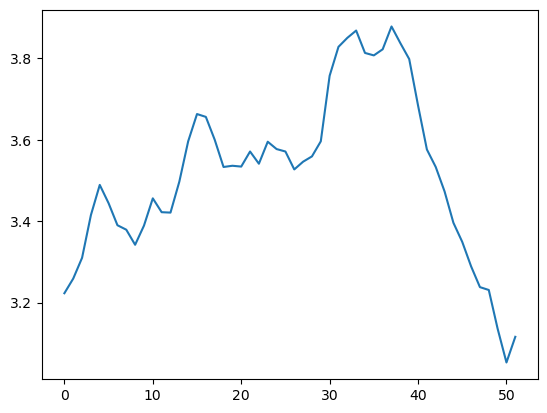

In [50]:
# plot the gas prices


plt.plot(gas_prices_2023, '-');

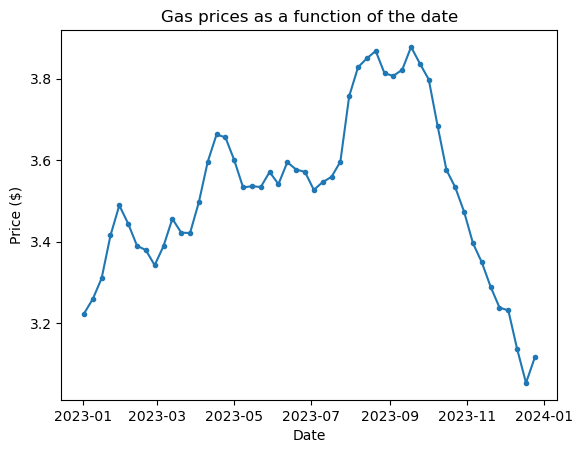

In [51]:
# plot the gas prices better!

plt.plot(gas_dates_2023, gas_prices_2023, '.-');  
plt.xlabel("Date");
plt.ylabel("Price ($)")
plt.title("Gas prices as a function of the date");



<br>
<br>
<br>
<p>
<center><img src=https://cdn.quotesgram.com/img/69/59/1803591020-high-gas-prices.jpg></center>

## 3. Boolean arrays

We can easily compare all values in an ndarray to a particular value. The result will return an ndarray of Booleans. 

Since Boolean `True` values are treated as 1's, and Boolean `False` values are treated as 0's, this makes it easy to see how many values in an array meet particular conditions. 

In [62]:
# Test all values in an array that are less than 5
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
bool_mask = my_array < 5
bool_mask


array([False,  True, False,  True,  True,  True, False,  True])

In [63]:
# How many values are less than 5?

np.sum(bool_mask)


np.int64(5)

In [65]:
# How many (and what proportion) of weeks in 2023 were gas prices were below $3.50?

bool_mask_2 = gas_prices_2023 < 3.50
np.sum(bool_mask_2)


np.int64(23)

### Example: What proportion of movies passed the Bechdel test revisited 

Let's calculate (again) the proportion of movies that passed the Bechdel test, but this time using numpy array computations. 

The code below loads the Bechdel data, and we will focus on the `bechdel` list, which is a list of strings saying whether movies passed ('PASS') or failed ('FAIL') the Bechdel test.



In [66]:
import YData
import pandas as pd

YData.download_data("movies.csv")

movies = pd.read_csv("movies.csv")
col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']
movies =   movies[col_names_to_keep]

movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])


# get lists of data for our data analysis
title = movies["title"].to_list()
bechdel = movies["binary"].to_list()
bechdel_reason = movies["clean_test"].to_list()

domgross_2013 = movies["domgross_2013"].to_list()
budget_2013 = movies["budget_2013"].to_list() 
year = movies["year"].to_list()


bechdel[0:5]


['FAIL', 'PASS', 'FAIL', 'FAIL', 'FAIL']

In [77]:

# convert the list to an ndarray

bechdel_array = np.array(bechdel)
domgross_2013_array = np.array(domgross_2013)


# create a Boolean array of that is True for movies that passed the Bechdel test

bool_mask_bechdel = (bechdel_array == "PASS")
print(bool_mask_bechdel)

# calculate the proportion of movies that passed the Bechdel test

print(np.sum(bool_mask_bechdel)/bool_mask_bechdel.shape[0])


# alternatively, we can use the np.mean() function 
print(np.mean(bool_mask_bechdel))



[False  True False ... False False  True]
0.44707207207207206
0.44707207207207206


## 4. Boolean subsetting/indexing/masking

We can also use Boolean arrays to return values in another array. This is referred to as "Boolean Subsetting", Boolean masking" or "Boolean indexing"


In [82]:
# initial array
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])


# create Boolean array for values less than 5

bool_mask


# get values of my_array that are less than 5

my_array_subset = my_array[bool_mask]
my_array_subset 



array([4, 3, 4, 3, 4])

### Example: calculate the average revenue for movies that passed the Bechdel test 

In [85]:
# Calculate the average revenue for movies that passed the Bechdel test 


# create an ndarray of revenues
domgross_2013_array


# use the boolean mask to extract movies the pass the Bechdel test
domgross_2013_array_subset = domgross_2013_array[bool_mask_bechdel]


# get the average revenue of movies that passed the Bechdel test
np.mean(domgross_2013_array_subset)



np.float64(79591918.51259446)

## 5. Percentiles

The Pth percentile is the value of a quantitative variable which is greater than P percent of the data. 

We can calculate percentiles using the numpy function `np.percentile()`

Let's calculate the 25th, 50th, and 75th percentile for the Bechdel movie revenue data.


In [87]:
## Get the 25th, 50th and 75th percentile of movie revenues

bechdel_percentiles = np.percentile(domgross_2013_array, [25, 50, 75])

bechdel_percentiles



array([2.05465938e+07, 5.59936405e+07, 1.21678352e+08])

Question: What is another way to calculate the 50th percentile? 


In [88]:

np.median(domgross_2013_array)


np.float64(55993640.5)

Other commonly calculated statistics include:

- Five Number Summary = (minimum, Q1, median, Q3, maximum)
- Range = maximum – minimum
- Interquartile range (IQR) = Q3 – Q1

Where:
- Q1 = 25th percentile
- Q3 = 75th percentile

Let's calculate these for the Bechdel revenue data...


In [89]:
# Range

np.max(domgross_2013_array) - np.min(domgross_2013_array)

np.float64(1771681891.0)

In [94]:
# Interquartile range (IQR)

print(np.percentile(domgross_2013_array, 75) - np.percentile(domgross_2013_array, 25))



# Alternatively
np.diff(np.percentile(domgross_2013_array, [25, 75]))



101131758.25


array([1.01131758e+08])

In [96]:
# Five number summary

five_num = np.array([np.min(domgross_2013_array), 
                     np.percentile(domgross_2013_array, 25),
                     np.percentile(domgross_2013_array, 50),
                     np.percentile(domgross_2013_array, 75),
                     np.max(domgross_2013_array)])

print(five_num)



# Alternatively
np.percentile(domgross_2013_array, [0, 25, 50, 75, 100])




[8.99000000e+02 2.05465938e+07 5.59936405e+07 1.21678352e+08
 1.77168279e+09]


array([8.99000000e+02, 2.05465938e+07, 5.59936405e+07, 1.21678352e+08,
       1.77168279e+09])

## 5. Box plots

A box plot is a graphical display of the five-number summary and consists of:

   1. Drawing a box from Q1  to Q3   

   2. Dividing the box with a line (or dot) drawn at the median

   3. Draw a line from each quartile to the most extreme data value that is not and outlier

   4. Draw a dot/asterisk for each outlier data point.


Create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test


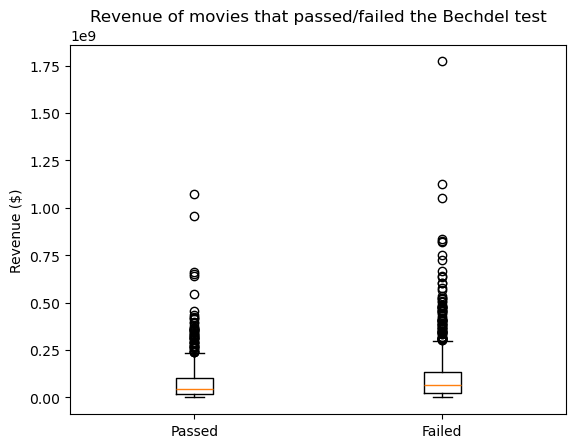

In [101]:
# get the movies that failed the Bechdel test

failed_domgross_2013 = domgross_2013_array[bechdel_array == "FAIL"]

# create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test

plt.boxplot([domgross_2013_array_subset, failed_domgross_2013], 
            tick_labels= ["Passed", "Failed"]);
plt.ylabel("Revenue ($)");
plt.title("Revenue of movies that passed/failed the Bechdel test");



## 6. Higher dimensional arrays

In [102]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [103]:
# slicing to get a submatrix 

my_matrix[0:2, 0:2]   # like array slicing, it does return a value at the end index

array([[1, 2],
       [4, 5]])

In [104]:
my_matrix2 = my_matrix.copy()  # copy the matrix


# set particular index values to 100

my_matrix2[0:2, 0:2] = 100  # set particular index values to 100

my_matrix2



array([[100, 100,   3],
       [100, 100,   6],
       [  7,   8,   9]])

In [105]:
# sum all the values

print(np.sum(my_matrix))

45


In [106]:
# sum down the rows 
np.sum(my_matrix, axis = 0)


array([12, 15, 18])

In [107]:
# sum across the columns
np.sum(my_matrix, axis = 1)


array([ 6, 15, 24])

In [108]:
# create a Boolean array for all values less than 5
my_matrix < 5


array([[ True,  True,  True],
       [ True, False, False],
       [False, False, False]])

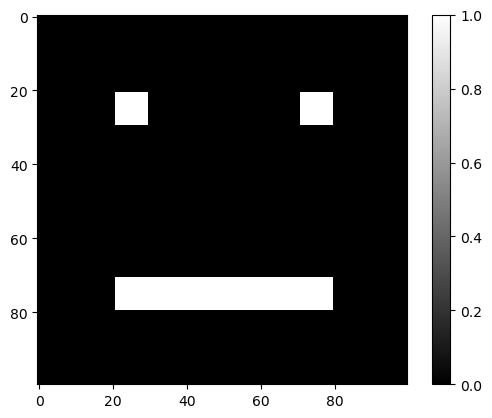

In [110]:
# what does the following do? 

face_array = np.zeros([100, 100])  # create a matrix of all 0's 

face_array[21:30, 21:30] = 1  # assign particular regions the value of 1
face_array[21:30, 71:80] = 1
face_array[71:80, 21:80] = 1

plt.imshow(face_array, cmap = 'gray');
plt.colorbar();

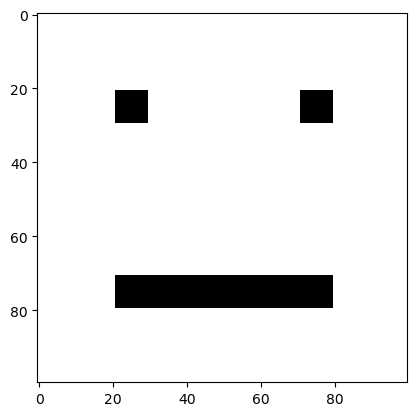

In [111]:
# convert face_array to a boolean matrix

face_array = face_array.astype("bool")
plt.imshow(~face_array, cmap = 'gray');

## 7. Image processing

We can use numerical arrays (and NumPy) to do image processing. Let's explre this now.

In [112]:
# download an image of a famous Yale alumni
YData.download_image("burns.jpeg")

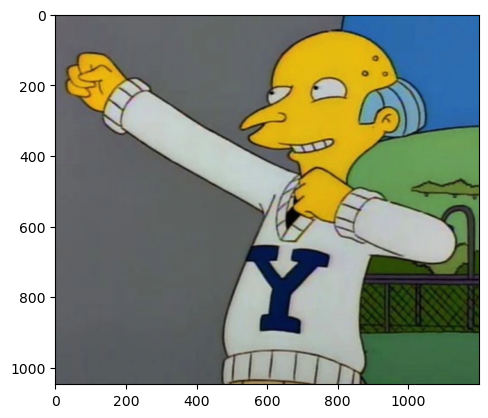

In [114]:
# load in an image 

from imageio.v3 import imread

I = imread("burns.jpeg")

plt.imshow(I);

In [115]:
# get the type and shape of the image

print(I.dtype)
I.shape


uint8


(1047, 1200, 3)

(1047, 1200, 3)
float64


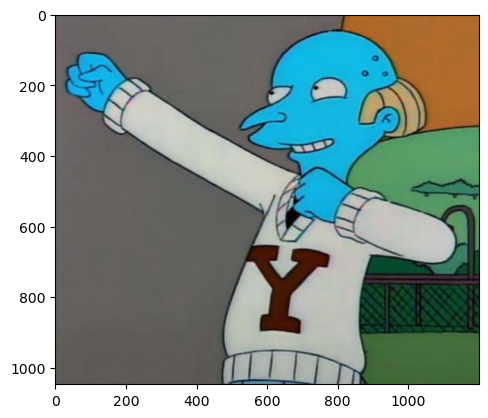

In [117]:
# Let's reverse the red and blue channels

# extract each color channel as a matrix
r_channel = I[:, :, 0]
g_channel = I[:, :, 1]
b_channel = I[:, :, 2]

# create new image where color channels will be swapped

rev_rb = np.zeros(I.shape)
print(rev_rb.shape)


# swap channels
rev_rb[:, :, 0] = b_channel
rev_rb[:, :, 1] = g_channel
rev_rb[:, :, 2] = r_channel


# convert to ints
print(rev_rb.dtype)
rev_rb = rev_rb.astype("int")


# display the image
plt.imshow(rev_rb);


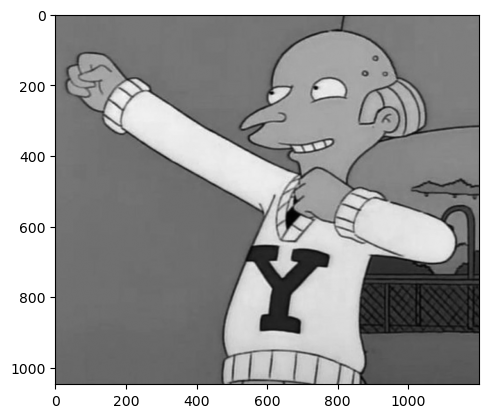

In [118]:
# To create a grayscale image - use the average value in all three r, g, b channels
mean_image = np.mean(I, axis = 2)

plt.imshow(mean_image, cmap='gray');



(1047, 1200, 3)


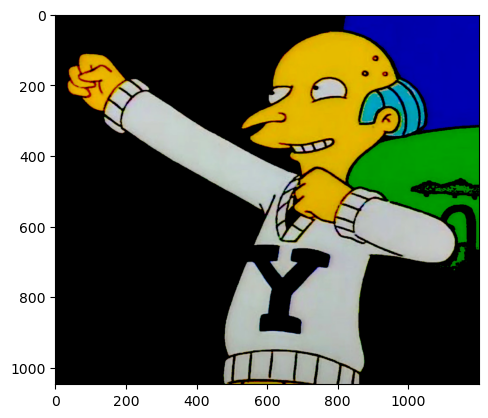

In [120]:
# Image masking - make all drak pixels even darker (set to a value of 0)

# copy the image and create a darkening mask

darken = I.copy()
darken_mask = darken < 128 
print(darken_mask.shape)


# darken the pixels and display the image
darken[darken_mask] = 0
plt.imshow(darken);

## 6. Tuples

Tuples are a basic data structure in Python that is like a list. However, unlike lists, elements in tuples are "immutable" meaning that once we create a tuple, we can not modify the values in the tuple.

We create tuples by using values in parentheses separated by commas:

`my_tuple = (10, 20, 30)`

Let's explore tuples now... 


In [121]:
# create a tuple
my_tuple = (10, 20, 30)

my_tuple


(10, 20, 30)

In [122]:
# we can access elements of the tuple using square brackets (the same as lists)

my_tuple[1]

20

In [123]:
# unlike a list, we can't reassign values in a tuple 
my_tuple[1] = 50

TypeError: 'tuple' object does not support item assignment

In [124]:
# We extract values from tuples into regular names using "tuple unpacking"

val1, val2, val3 = my_tuple


val3


30

## 7. Dictionaries

Dictionaries allow us to look up values. In particular, we provide a "key" and the dictionary return a "value". 

We can create dictionaries using the syntax: 

`my_dict = {"key1": 1, "key2": 20}`


In [125]:
# create a dictionary 
my_dict = {"key1": 1, "key2": 20}
my_dict


{'key1': 1, 'key2': 20}

In [126]:
# we can access elements using square brackets 
my_dict["key2"]


20

In [127]:
# values in dictionaries can be list
my_dict2 = {"a": [1, 2, 3, 4], "b": ["a", "b", "c"], "c": [True, False]}
my_dict2["c"]


[True, False]

In [128]:
# We can create a dictionary from two lists of the same length using the dict() and zip() functions

my_list = [1, 2, 3]
my_list2 = ["a", "b", "c"]

my_dict3 = dict(zip(my_list2, my_list))

print(my_dict3)

my_dict3["b"]





{'a': 1, 'b': 2, 'c': 3}


2

In [131]:
# create a dictionary between players and their salaries

player_salaries = dict(zip(name_list, salary_list))

# what is Stephen Curry's salary? 

player_salaries["Stephen Curry"]


48070014